In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_prominences
from scipy.integrate import simpson

# EDA

In [2]:
# assign number per point in the 11x11 grid
names = ['wn'] + [i for i in range(121)]

s1 = pd.read_csv('data/raw/S1_bkg_mapA_11x11.txt', delim_whitespace=True, names=names)
s2 = pd.read_csv('data/raw/S2_bkg_mapA_11x11.txt', delim_whitespace=True, names=names)

s1.head()

,wn,0,1,2,3,4,5,6,7,8,...,111,112,113,114,115,116,117,118,119,120
0,184.0,11.977942,13.795880,24.564039,6.518834,8.654982,21.038538,12.663731,4.563099,23.769987,...,11.505854,14.530693,10.237762,21.346143,7.906324,21.652784,14.143768,19.417584,91.724807,5.548706
1,185.0,12.903638,13.703474,25.398514,9.550134,11.677319,16.896498,13.116098,5.804119,22.642953,...,10.663801,14.180401,10.864942,19.723728,10.019642,23.616328,17.889618,19.370846,90.870344,5.346441
2,186.0,13.022181,13.521960,25.813691,10.147634,12.410180,15.605156,12.970261,6.023841,22.187466,...,10.294041,14.092665,11.135437,19.089159,10.693783,23.921602,18.683708,19.249165,90.861125,5.227106
3,187.0,12.646595,13.195729,26.938186,10.144902,13.511824,14.764290,12.390567,5.847381,20.855562,...,9.510330,14.195345,11.818230,18.161097,11.284741,23.884462,18.833665,19.254515,91.470588,4.841340
4,188.0,11.086520,12.556653,29.521095,8.553948,15.083337,15.352425,10.862662,4.688388,17.690963,...,7.914280,14.660162,13.337211,16.760005,11.415963,22.920739,17.164942,19.549975,93.453007,3.878598


In [3]:
# computation of spectra intensities
s1_intensities = simpson(s1[[i for i in range(121)]].values.T, s1.wn)
s2_intensities = simpson(s2[[i for i in range(121)]].values.T, s2.wn)

# normalization of spectra
s1[[i for i in range(121)]] = s1[[i for i in range(121)]].div(s1_intensities, axis=1)
s2[[i for i in range(121)]] = s2[[i for i in range(121)]].div(s2_intensities, axis=1)

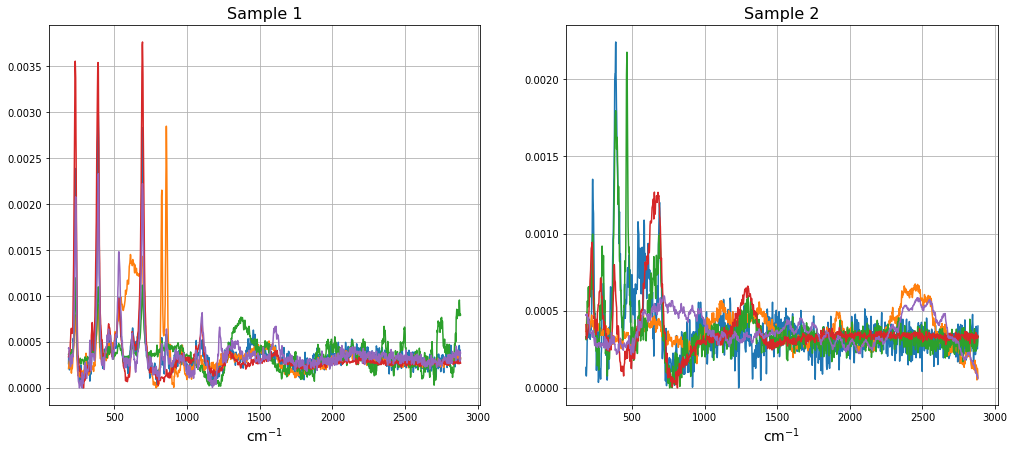

In [4]:
random_sites = np.random.choice(121, replace=False, size=5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

for site in random_sites:
    ax1.plot(s1.wn, s1[site])
ax1.set_title('Sample 1', fontsize=16)
ax1.set_xlabel('cm$^{-1}$', fontsize=14)
ax1.grid()

for site in random_sites:
    ax2.plot(s1.wn, s2[site])
ax2.set_title('Sample 2', fontsize=16)
ax2.set_xlabel('cm$^{-1}$', fontsize=14)
ax2.grid()

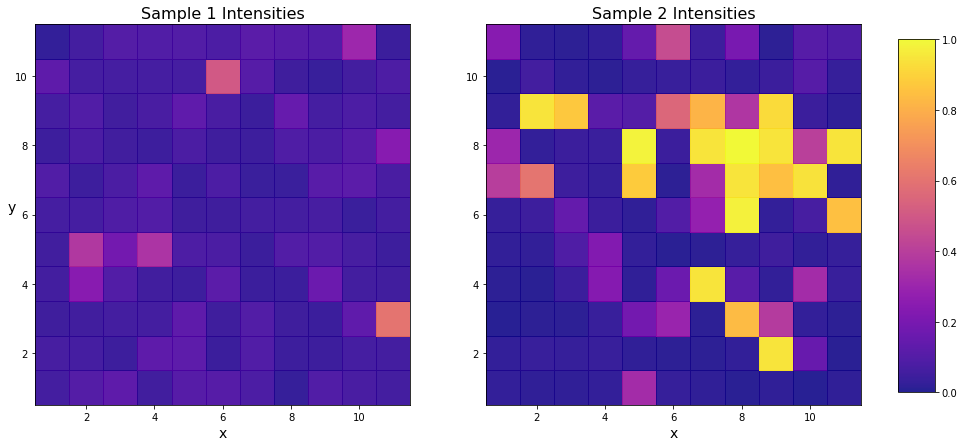

In [5]:
x, y = np.meshgrid(np.arange(1, 12), np.arange(1, 12))

# maximum intensity between the two samples
max_intensity = max(max(s1_intensities), max(s2_intensities))

# plot of intensities per site on a scale between 0 to 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

s1_intensity_grid = s1_intensities.reshape(11, 11) / max_intensity
c = ax1.pcolormesh(x, y, s1_intensity_grid, vmin=0, vmax=1,
                   cmap='plasma', alpha=0.9, edgecolors='face')

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14, rotation='horizontal')
ax1.set_title('Sample 1 Intensities', fontsize=16)

s2_intensity_grid = s2_intensities.reshape(11, 11) / max_intensity
c = ax2.pcolormesh(x, y, s2_intensity_grid, vmin=0, vmax=1,
                   cmap='plasma', alpha=0.9, edgecolors='face')

ax2.set_xlabel('x', fontsize=14)
ax2.set_title('Sample 2 Intensities', fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.03, 0.7])
fig.colorbar(c, cax=cbar_ax)

plt.show()

# Peak detection

## scipy.signal.find_peaks

    Find peaks inside a signal based on peak properties.

    This function takes a 1-D array and finds all local maxima by simple comparison of neighboring values. Optionally, a subset of these peaks can be selected by specifying conditions for a peak’s properties.

The peak properties chosen here are the prominence and the width. 

*The prominence of a peak may be defined as the least drop in height necessary in order to get from the summit to any higher terrain.* [Wikipedia](https://en.wikipedia.org/wiki/Topographic_prominence)

The particular values chosen for the prominence and width are based on inspection of the results of the scipy function on the reference spectra, and are respectively 0.005 and 10. 

In [6]:
# compute number of peaks per site and prominence per peak
s1_peaks, s1_prominences = [], []
for i in range(121):
    indexes, properties = find_peaks(s1[i].values, prominence=0.0005, width=10)
    s1_peaks.append(indexes.shape[0])
    s1_prominences.append(properties['prominences'])

s1_peaks = np.array(s1_peaks)
# "weighted" sum of peaks with prominences as weights
s1_prominences = np.array([sum(prominces_per_sites) for prominces_per_sites in s1_prominences])

In [7]:
# compute number of peaks per site and prominence per peak
s2_peaks, s2_prominences = [], []
for i in range(121):
    indexes, properties = find_peaks(s2[i].values, prominence=0.0005, width=10)
    s2_peaks.append(indexes.shape[0])
    s2_prominences.append(properties['prominences'])

s2_peaks = np.array(s2_peaks)
# "weighted" sum of peaks with prominences as weights
s2_prominences = np.array([sum(prominces_per_sites) for prominces_per_sites in s2_prominences])

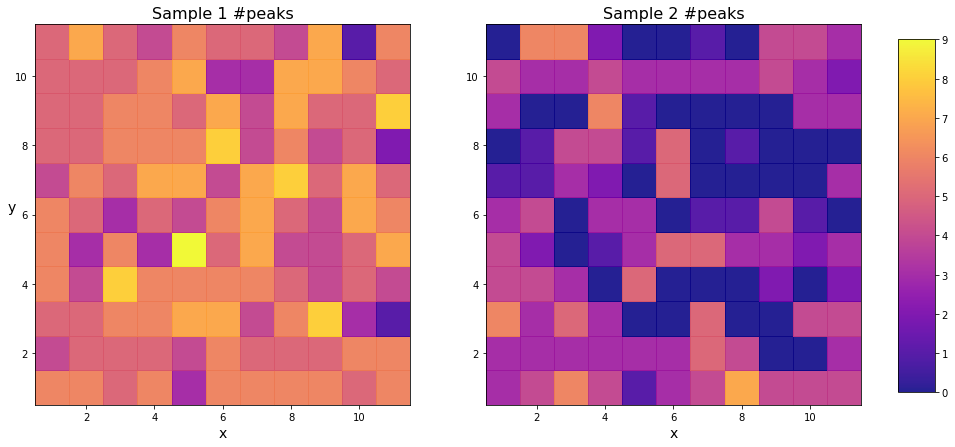

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

max_peaks = max(max(s1_peaks), max(s2_peaks))
c = ax1.pcolormesh(x, y, s1_peaks.reshape((11, 11)), vmin=0, vmax=max_peaks, 
                   cmap='plasma', alpha=0.9, edgecolors='face')

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14, rotation='horizontal')
ax1.set_title('Sample 1 #peaks', fontsize=16)

c = ax2.pcolormesh(x, y, s2_peaks.reshape((11, 11)), vmin=0, vmax=max_peaks, 
                   cmap='plasma', alpha=0.9, edgecolors='face')

ax2.set_xlabel('x', fontsize=14)
ax2.set_title('Sample 2 #peaks', fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.03, 0.7])
fig.colorbar(c, cax=cbar_ax)

plt.show()

The number of peaks and their prominence can be considered as a signal of much information there is in the
spectrum. The "weighted" sum of the peaks per site with prominence as weights is reported in the following graphs, giving a measure of the amount of clear information in a spectrum.

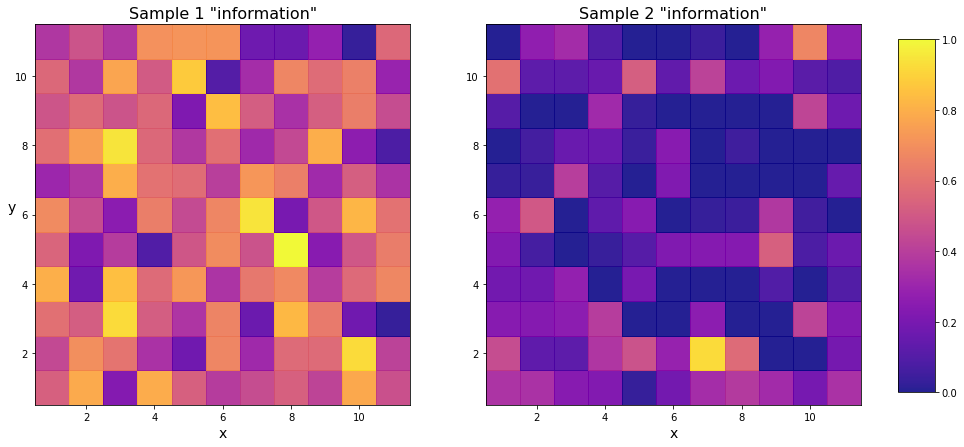

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

max_prominence = max(max(s1_prominences), max(s2_prominences))
c = ax1.pcolormesh(x, y, s1_prominences.reshape((11, 11)) / max_prominence, 
                   vmin=0, vmax=1, cmap='plasma', alpha=0.9, edgecolors='face')

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14, rotation='horizontal')
ax1.set_title('Sample 1 "information"', fontsize=16)

c = ax2.pcolormesh(x, y, s2_prominences.reshape((11, 11)) / max_prominence, 
                   vmin=0, vmax=1, cmap='plasma', alpha=0.9, edgecolors='face')

ax2.set_xlabel('x', fontsize=14)
ax2.set_title('Sample 2 "information"', fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.03, 0.7])
fig.colorbar(c, cax=cbar_ax)

plt.show()